# Initial data explorations

In this notebook, I want to explore the variables to try and determine a suitable outcome for prediction, whether it be for going into debt or predicting loan repayment

In [11]:
import os
import glob
import pandas as pd 

# sci python and visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [2]:
os.listdir()

['info.pdf',
 'initial_exploration.ipynb',
 'diaries_transactions_all.csv',
 'README.md',
 '.gitignore',
 '.ipynb_checkpoints',
 '.git']

In [3]:
data = pd.read_csv('diaries_transactions_all.csv', low_memory = False)

In [4]:
column_names = data.columns
print(column_names)

Index(['hh_ids', 'unique_hhs', 'first_trx_date_hh', 'last_trx_date_hh',
       'tot_hh_daysofobs', 'tot_hh_monthsofobs', 'interview_designation',
       'int_date', 'int_month', 'int_year', 'int_yr_mo', 'first_int_date',
       'account_ids', 'unique_accnts', 'm_ids_owner', 'unique_hm_owner',
       'account_bsheet_desig', 'account_startclose_balance', 'account_formal',
       'account_liquid', 'first_trx_date_acc', 'last_trx_date_acc',
       'tot_acc_daysofobs', 'tot_acc_monthsofobs', 'trx_id', 'm_ids_trx',
       'trx_date', 'trx_month', 'trx_year', 'trx_yr_mo', 'trx_dq_round',
       'trx_stdtime_days_hh', 'trx_stdtime_mnths_hh', 'trx_stdtime_days_acc',
       'trx_stdtime_mnths_acc', 'trx_class_code', 'trx_class_desc',
       'trx_family_code', 'trx_family_desc', 'trx_type_code', 'trx_type_desc',
       'trx_prx_purpose', 'trx_prx_purpose_fd', 'trx_fee',
       'trx_bsheet_direction', 'trx_mode_code', 'trx_mode_desc',
       'trx_place_incommunity', 'trx_distance_km', 'trx_outlet'

In [5]:
data.shape

(483949, 58)

In [6]:
data.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,...,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
0,KELDL02,NaN,03sep2012,02oct2013,394,13,04=Diaries Interview,02oct2013,10,2013,...,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.586210
1,KVIHC16,NaN,24sep2012,19sep2013,360,12,04=Diaries Interview,22apr2013,4,2013,...,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,7.206897
2,KELDK21,NaN,20sep2012,22oct2013,397,13,04=Diaries Interview,02oct2013,10,2013,...,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.000000
3,KMOMT22,NaN,21sep2012,01nov2013,406,14,04=Diaries Interview,21feb2013,2,2013,...,NaN,NaN,Inflow,710.0,8.352942,0,NaN,NaN,NaN,4.793103
4,KMOMT32,NaN,20sep2012,18oct2013,393,13,04=Diaries Interview,02may2013,5,2013,...,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,6.517241


In [7]:
data["unique_hhs"].isnull().value_counts()

True     483651
False       298
Name: unique_hhs, dtype: int64

## Getting a sense for how many missing values there are in this data: 

In [9]:
for col in column_names: 
    print('===========================')
    print(data[col].isnull().value_counts())

False    483949
Name: hh_ids, dtype: int64
True     483651
False       298
Name: unique_hhs, dtype: int64
False    483949
Name: first_trx_date_hh, dtype: int64
False    483949
Name: last_trx_date_hh, dtype: int64
False    483949
Name: tot_hh_daysofobs, dtype: int64
False    483949
Name: tot_hh_monthsofobs, dtype: int64
False    483681
True        268
Name: interview_designation, dtype: int64
False    483949
Name: int_date, dtype: int64
False    483949
Name: int_month, dtype: int64
False    483949
Name: int_year, dtype: int64
False    483949
Name: int_yr_mo, dtype: int64
False    483949
Name: first_int_date, dtype: int64
False    483949
Name: account_ids, dtype: int64
True     474403
False      9546
Name: unique_accnts, dtype: int64
False    483949
Name: m_ids_owner, dtype: int64
True     483279
False       670
Name: unique_hm_owner, dtype: int64
True     406879
False     77070
Name: account_bsheet_desig, dtype: int64
True     477007
False      6942
Name: account_startclose_balance, dty

## Looking at the variables: 

In [18]:
len(column_names)

58

In [19]:
column_names[0:29]

Index(['hh_ids', 'unique_hhs', 'first_trx_date_hh', 'last_trx_date_hh',
       'tot_hh_daysofobs', 'tot_hh_monthsofobs', 'interview_designation',
       'int_date', 'int_month', 'int_year', 'int_yr_mo', 'first_int_date',
       'account_ids', 'unique_accnts', 'm_ids_owner', 'unique_hm_owner',
       'account_bsheet_desig', 'account_startclose_balance', 'account_formal',
       'account_liquid', 'first_trx_date_acc', 'last_trx_date_acc',
       'tot_acc_daysofobs', 'tot_acc_monthsofobs', 'trx_id', 'm_ids_trx',
       'trx_date', 'trx_month', 'trx_year'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112bd6cc0>,
      dtype=object)

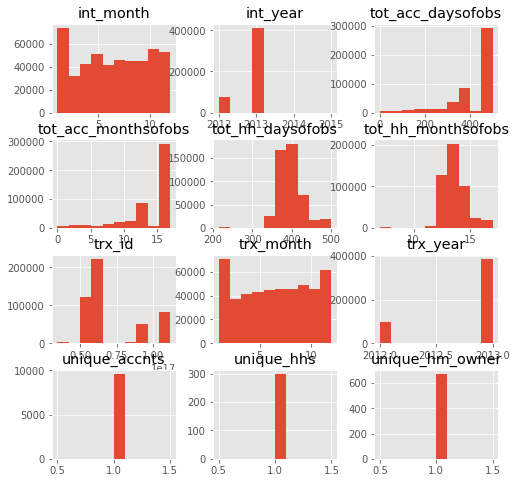

In [20]:
data[['hh_ids', 'unique_hhs', 'first_trx_date_hh', 'last_trx_date_hh',
       'tot_hh_daysofobs', 'tot_hh_monthsofobs', 'interview_designation',
       'int_date', 'int_month', 'int_year', 'int_yr_mo', 'first_int_date',
       'account_ids', 'unique_accnts', 'm_ids_owner', 'unique_hm_owner',
       'account_bsheet_desig', 'account_startclose_balance', 'account_formal',
       'account_liquid', 'first_trx_date_acc', 'last_trx_date_acc',
       'tot_acc_daysofobs', 'tot_acc_monthsofobs', 'trx_id', 'm_ids_trx',
       'trx_date', 'trx_month', 'trx_year']].hist(figsize=(8, 8))

In [21]:
column_names[29:59]

Index(['trx_yr_mo', 'trx_dq_round', 'trx_stdtime_days_hh',
       'trx_stdtime_mnths_hh', 'trx_stdtime_days_acc', 'trx_stdtime_mnths_acc',
       'trx_class_code', 'trx_class_desc', 'trx_family_code',
       'trx_family_desc', 'trx_type_code', 'trx_type_desc', 'trx_prx_purpose',
       'trx_prx_purpose_fd', 'trx_fee', 'trx_bsheet_direction',
       'trx_mode_code', 'trx_mode_desc', 'trx_place_incommunity',
       'trx_distance_km', 'trx_outlet', 'trx_direction', 'trx_value_kes',
       'trx_value_usd', 'ddd_gift', 'trx_inkind_units', 'trx_inkind_value_usd',
       'trx_inkind_value_kes', 'trx_stdtime_mnths_hh_nr'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11511a898>,
      dtype=object)

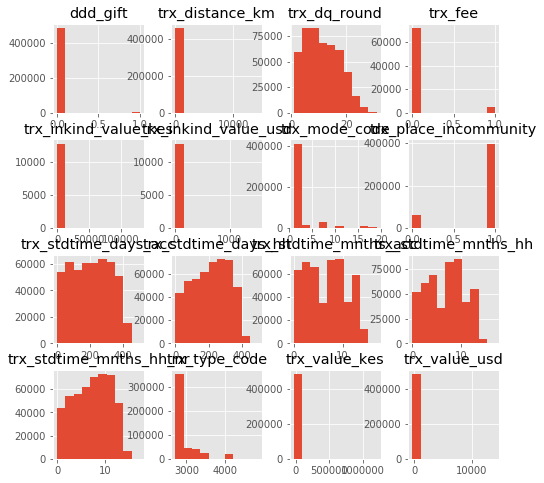

In [22]:
data[['trx_yr_mo', 'trx_dq_round', 'trx_stdtime_days_hh',
       'trx_stdtime_mnths_hh', 'trx_stdtime_days_acc', 'trx_stdtime_mnths_acc',
       'trx_class_code', 'trx_class_desc', 'trx_family_code',
       'trx_family_desc', 'trx_type_code', 'trx_type_desc', 'trx_prx_purpose',
       'trx_prx_purpose_fd', 'trx_fee', 'trx_bsheet_direction',
       'trx_mode_code', 'trx_mode_desc', 'trx_place_incommunity',
       'trx_distance_km', 'trx_outlet', 'trx_direction', 'trx_value_kes',
       'trx_value_usd', 'ddd_gift', 'trx_inkind_units', 'trx_inkind_value_usd',
       'trx_inkind_value_kes', 'trx_stdtime_mnths_hh_nr']].hist(figsize=(8, 8))